In [1]:
import pandas as pd

In [2]:
age_gender_df = pd.read_csv('nz_popu_gender.csv').set_index('Category')

In [3]:
age_gender_df

,Male,Female
Category,,
0–4 years,0.065,0.060
5–9 years,0.071,0.066
10–14 years,0.067,0.063
15–19 years,0.066,0.062
20–24 years,0.071,0.065
25–29 years,0.075,0.072
30–34 years,0.067,0.068
35–39 years,0.062,0.063
40–44 years,0.061,0.063


In [4]:
cov19_seve_df = pd.read_csv('cov19_seve_ratio.csv')

cov19_seve_df.set_index(cov19_seve_df.columns[0], inplace=True)

In [5]:
cov19_seve_df.columns = ['hospitalisation', 'critical', 'fatality']

In [6]:
cov19_seve_df.critical *= cov19_seve_df.hospitalisation

In [7]:
cov19_seve_df

,hospitalisation,critical,fatality
Age−group (years),,,
0 to 9,0.001,0.000050,0.00002
10 to 19,0.003,0.000150,0.00006
20 to 29,0.012,0.000600,0.00030
30 to 39,0.032,0.001600,0.00080
40 to 49,0.049,0.003087,0.00150
50 to 59,0.102,0.012444,0.00600
60 to 69,0.166,0.045484,0.02200
70 to 79,0.243,0.104976,0.05100
80+,0.273,0.193557,0.09300


In [8]:
nz_male_total = 2319558
nz_female_total = 2380197

In [9]:
age_gender_df.Male = age_gender_df.Male * nz_male_total
age_gender_df.Female = age_gender_df.Female * nz_female_total

In [10]:
nz_total_popu = 4699755

In [11]:
age_ratio_df = pd.DataFrame(age_gender_df['Male'] + age_gender_df['Female'], columns=['Age ratio']) / nz_total_popu

In [12]:
age_ratio_df

,Age ratio
Category,
0–4 years,0.062468
5–9 years,0.068468
10–14 years,0.064974
15–19 years,0.063974
20–24 years,0.067961
25–29 years,0.073481
30–34 years,0.067506
35–39 years,0.062506
40–44 years,0.062013


## Merge the age ratio dataframe by every two rows

In [13]:
import numpy as np

In [14]:
age_ratio_df = age_ratio_df.groupby(np.arange(len(age_ratio_df))//2).sum()
age_ratio_df.index = cov19_seve_df.index

In [15]:
import math

In [16]:
math.log(nz_total_popu * 2 + 1, 2.4)

18.340081763673457

In [17]:
age_ratio_df

,Age ratio
Age−group (years),
0 to 9,0.130935
10 to 19,0.128948
20 to 29,0.141442
30 to 39,0.130013
40 to 49,0.130532
50 to 59,0.130013
60 to 69,0.104013
70 to 79,0.067532
80+,0.036077


In [18]:
nz_hos_ratio_df = (1 - cov19_seve_df).mul(age_ratio_df['Age ratio'], axis=0)

In [19]:
no_hos_ratio = nz_hos_ratio_df.sum()

In [20]:
no_hos_ratio

hospitalisation    0.929948
critical           0.978364
fatality           0.989286
dtype: float64

In [21]:
math.log(0.05, no_hos_ratio.hospitalisation)

41.24837748045957

In [22]:
math.log(0.05, no_hos_ratio.critical)

136.95476673037146

In [23]:
def infect_total(r0, n):
    return (r0 ** n - 1)/2 

In [30]:
def infect_days(r0, n):
    return math.log(n*2+1, r0)

In [31]:
infect_days(2.4, 42)

5.0745972607979235

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
x = np.linspace(1, 6, 100)

In [60]:
y = (2.4 ** x - 1)/ 2 

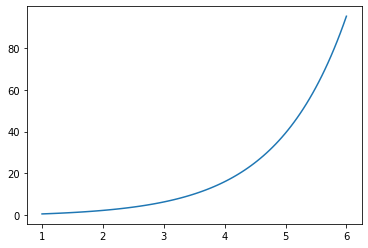

In [61]:
plt.plot(x, y)
# plt.plot(x, 5, )

In [25]:
2.4 ** 4

33.1776

In [26]:
2.4 ** 5

79.62623999999998

In [27]:
2.4 ** 6

191.10297599999996

In [28]:
2.4 ** 7

458.6471423999999

In [29]:
infect_total(2.4, 6)

95.05148799999998